# Problem 2


Consider the funnel that we analyzed in homework 1, shown below, with a radius of the hole in the bottom of $R$ and a height of $H$. 

$$
u = \sqrt{2gh} \tag{1}
$$


#### Problem 2.1
Derive $\frac{dh}{dt}$ in terms of $h$, $R$, $\theta$, $\dot{V}_{in}$, and $\dot{V}_{out}$
</br></br>
Combinging the relationships
$$
\frac{dV}{dt} = \dot{V}_{in} - \dot{V}_{out} \tag{2}
$$
and 
$$
dV = A_cdh \tag{3}
$$
we get
$$
\frac{dh}{dt} = \frac{\dot{V}_{in}-\dot{V}_{out}}{A_c} \tag{4}
$$
substituting $A_c = \pi r^2$ and $r = R + h\tan(90-\theta)$ (solved in HW1) into ([4](#mjx-eqn-4)) produces

$$
\frac{dh}{dt} = \frac{\dot{V}_{in}-\dot{V}_{out}}{\pi (R+h\tan(90-\theta))^2} \tag{5}
$$

#### Problem 2.2
Find steady state liquid level $h$
</br></br>
at steady state, $\frac{dh}{dt} = 0$ $\therefore$ setting ([5](#mjx-eqn-5)) equal to zero we get
$$
0 = \dot{V}_{in}-\dot{V}_{out} = \dot{V}_{in}-uA_c
$$
substitute ([1](#mjx-eqn-1)) into $u$ to get
$$
\dot{V}_{in} =\dot{V}_{out} = \pi R^2\sqrt{2gh}\tag{6}
$$
rearange to get
$$
h = \frac{(\frac{\dot{V}_{in}}{\pi R^2})^2}{2g} \tag{7}
$$


#### Problem 2.3
Find R at steady state when funnel is half-full by volume
</br></br>
The following code uses ([6](#mjx-eqn-6)) and ([7](#mjx-eqn-7)) along with an equation for the volume of the tank derived in HW1:
$$
V_{ss} = \frac{\pi \tan(\theta)(R_{top}^3-R^3)}{6} = \frac{\pi \tan(\theta)(R_{top}^3-(r-h\tan(90-\theta))^3)}{6}
$$
to solve for the three unknowns r, R, and h

In [4]:
import numpy as np

Vin   = 50                 # inlet flow rate, cm^3/s
Rtop  = 20                 # radius of the top of the funnel, cm
theta = 50  * np.pi / 180  # angle - convert to radians
g     = 980               # cm/s^2

def resfun(x):
    r = x[0]  # unpack - ordering here must be consistent with the initial guess.
    R = x[1]
    h = x[2]
    # calculate each residual and return them as an array
    return [ 
        (np.pi*np.tan(theta)*(Rtop**3-(R**3))-np.pi*np.tan(theta)*(Rtop**3-(r-h*np.tan(np.pi/2-theta))**3))/6,
        h - (Vin/np.pi/R**2)**2/2/g,
        Vin-np.pi*R**2*np.sqrt(2*g*h)
    ]

In [19]:
from scipy.optimize import fsolve

roots = fsolve(resfun, # the function to set to zero
               [1,1,5] # guesses for the solution values r, R, h
              )
# unpack the solution - the ordering consistent with the 
# guess and how these are used in the residual function.
r = roots[0] 
R = roots[1]
h = roots[2]

print('Hole in the bottom is {:.2f} cm'.format(R))
print('Liquid level is {:.2f} cm'.format(h))
print('Funnel height is {:.2f} cm'.format(np.tan(theta) * (Rtop - R)))

# If we got the right solution, the residual values should be very close to zero.
# uncomment the next line to look at the residual values
print('residual values: ',resfun([r,R,h]))

Hole in the bottom is 0.83 cm
Liquid level is 0.28 cm
Funnel height is 22.85 cm
residual values:  [-7.882287415365378e-12, -1.2601031329495527e-14, 1.1226575225009583e-12]


#### Problem 2.4

##### Steady-State Height

In [26]:
R = 0.04  # cm
hss = 0.28
print('The steady-state height is {:.2f} cm'.format( hss ) )

The steady-state height is 0.28 cm


## Plot of $h(t)$
The following code uses ([5](#mjx-eqn-5)) to solve for $h$ as a function of time

In [21]:
def dhdt(h,t):
    return (Vin-np.pi*R**2*np.sqrt(2*g*h))/(np.pi*(R+h*np.tan(0.5*np.pi-theta))**2)

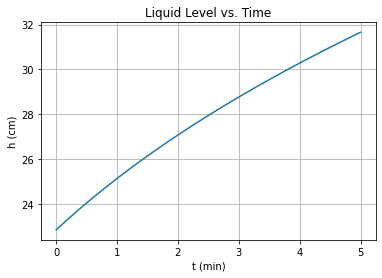

In [24]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

t  = np.linspace(0,5*60,400) # array of points in time we want to include in the plot
H0 = 22.85                       # initial height

soln = odeint( dhdt, H0, t )
h = soln[:,0]

plt.plot(t/60,h)
plt.xlabel('t (min)')
plt.ylabel('h (cm)')
plt.title('Liquid Level vs. Time')
plt.grid()
plt.show()

### Liquid level after 3 minutes

In [27]:
print('The liquid level at t={:.0f} minutes is {:0.2f} cm\n'.format( 5, h[-1] ) )

The liquid level at t=5 minutes is 31.66 cm

